In [1]:
import pandas as pd
data = pd.read_csv(r"C:\Users\saumy\OneDrive\CV Projects\E-commerce Customer Behavior.csv") 

In [3]:
# Display the first few rows to understand the data structure
print("First 5 rows:")
print(data.head())

# Get information about the columns, data types, and missing values
print("\nData Info:")
print(data.info())

# Get descriptive statistics (mean, std, min, max, etc.) for numerical columns
print("\nData Description:")
print(data.describe())

First 5 rows:
   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   Days Since Last Purchase Satisfaction Level  
0                        25          Satisfied  
1                        18            Neutral  
2                        42        Unsatisfied  
3 

In [4]:
# 1. Handle Missing Values
# Check for missing values
print("\nMissing Values Before:")
print(data.isnull().sum())

# For 'Satisfaction Level', let's fill missing values with the most frequent value (mode)
mode_satisfaction = data['Satisfaction Level'].mode()[0]  # mode() returns a Series, so we take the first element
data['Satisfaction Level'].fillna(mode_satisfaction, inplace=True)

# Verify that missing values are handled
print("\nMissing Values After:")
print(data.isnull().sum())


# 2. Check for Duplicates
print("\nNumber of Duplicate Rows Before:", data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("Number of Duplicate Rows After:", data.duplicated().sum())


Missing Values Before:
Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

Missing Values After:
Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

Number of Duplicate Rows Before: 0
Number of Duplicate Rows After: 0


In [5]:
# Feature Selection
selected_features = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']
data_selected = data[selected_features].copy() # Creating a copy to avoid modifying the original DataFrame

print("Selected Features:")
print(data_selected.head())
print("\nData Info for Selected Features:")
print(data_selected.info())

Selected Features:
   Age  Total Spend  Items Purchased  Average Rating  Days Since Last Purchase
0   29      1120.20               14             4.6                        25
1   34       780.50               11             4.1                        18
2   43       510.75                9             3.4                        42
3   30      1480.30               19             4.7                        12
4   27       720.40               13             4.0                        55

Data Info for Selected Features:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       350 non-null    int64  
 1   Total Spend               350 non-null    float64
 2   Items Purchased           350 non-null    int64  
 3   Average Rating            350 non-null    float64
 4   Days Since Last Purchase  350 non-

In [6]:
from sklearn.preprocessing import StandardScaler

# Scale the selected features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_selected)

# Create a Pandas DataFrame with the scaled data (optional, but good for visualization later)
scaled_df = pd.DataFrame(scaled_data, columns=data_selected.columns)

print("\nScaled Data:")
print(scaled_df.head())
print("\nScaled Data Info:")
print(scaled_df.info())
print("\nScaled Data Description:")
print(scaled_df.describe())


Scaled Data:
        Age  Total Spend  Items Purchased  Average Rating  \
0 -0.945152     0.760130         0.337346        1.001981   
1  0.082826    -0.179459        -0.385538        0.139479   
2  1.933185    -0.925570        -0.867461       -1.068024   
3 -0.739557     1.756144         1.542153        1.174482   
4 -1.356343    -0.345692         0.096385       -0.033022   

   Days Since Last Purchase  
0                 -0.118359  
1                 -0.639907  
2                  1.148256  
3                 -1.086947  
4                  2.116844  

Scaled Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       350 non-null    float64
 1   Total Spend               350 non-null    float64
 2   Items Purchased           350 non-null    float64
 3   Average Rating            350 non-nu

C:\Users\saumy\.spyder-py3\autosave\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\saumy\.spyder-py3\autosave\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\saumy\.spyder-py3\autosave\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\saumy\.spyder-py3\autosave\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMe

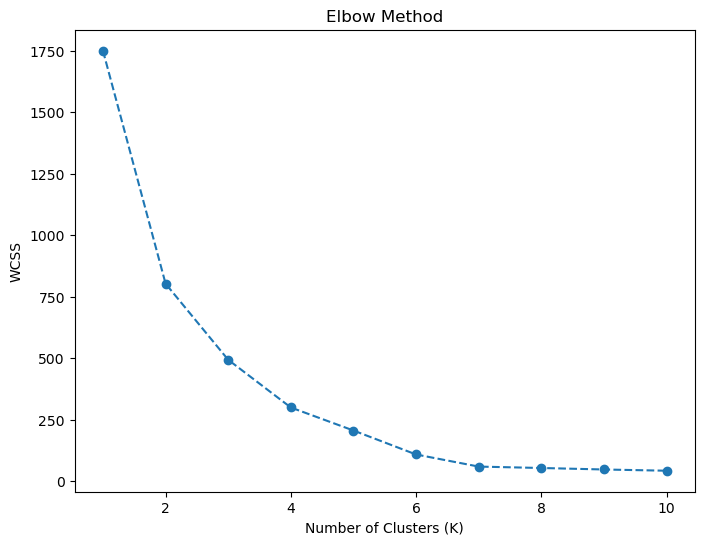

C:\Users\saumy\.spyder-py3\autosave\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\saumy\.spyder-py3\autosave\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\saumy\.spyder-py3\autosave\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\saumy\.spyder-py3\autosave\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMe

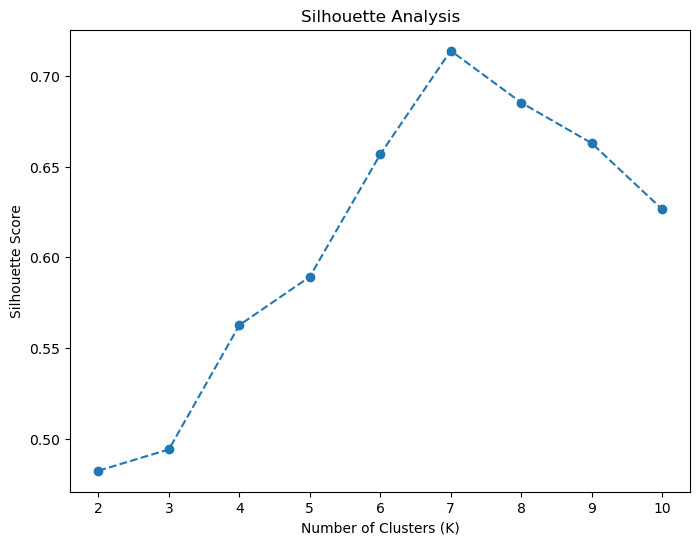


Data with Cluster Labels:
   Customer ID  Age  Total Spend  Cluster
0          101   29      1120.20        3
1          102   34       780.50        3
2          103   43       510.75        2
3          104   30      1480.30        1
4          105   27       720.40        0
5          106   37       440.80        2
6          107   31      1150.60        3
7          108   35       800.90        3
8          109   41       495.25        2
9          110   28      1520.10        1


C:\Users\saumy\.spyder-py3\autosave\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Determine the Optimal Number of Clusters (K)

# Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

# Silhouette Analysis
silhouette_scores = []
for i in range(2, 11):  # Silhouette score needs at least 2 clusters
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


# 2. Apply K-Means Clustering

# Let's assume, based on the plots, that the optimal number of clusters is 4 (This is a choice you'll make!)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(scaled_df)
labels = kmeans.labels_  # Get the cluster labels

# 3. Add Cluster Labels to the DataFrame

data['Cluster'] = labels  # Add the cluster labels to the original 'data' DataFrame

print("\nData with Cluster Labels:")
print(data[['Customer ID', 'Age', 'Total Spend', 'Cluster']].head(10))  # Show a subset of columns


Cluster Means:
| Cluster   | Customer ID   | Age     | Total Spend   | Items Purchased   | Average Rating   | Discount Applied   | Days Since Last Purchase   |
|:----------|:--------------|:--------|:--------------|:------------------|:-----------------|:-------------------|:---------------------------|
| 0         | 275.569       | 28.9483 | 690.39        | 11.6379           | 3.92759          | 1                  | 45.5                       |
| 1         | 275.068       | 29.1525 | 1455.55       | 19.9492           | 4.80847          | 0.0169492          | 11.2881                    |
| 2         | 276.362       | 39.3621 | 473.389       | 8.49138           | 3.325            | 0.5                | 31.6121                    |
| 3         | 274.829       | 32.4274 | 983.338       | 13.4444           | 4.3547           | 0.495726           | 19.9487                    |


C:\Users\saumy\AppData\Local\Temp\ipykernel_29252\76926571.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = data.groupby('Cluster').mean()


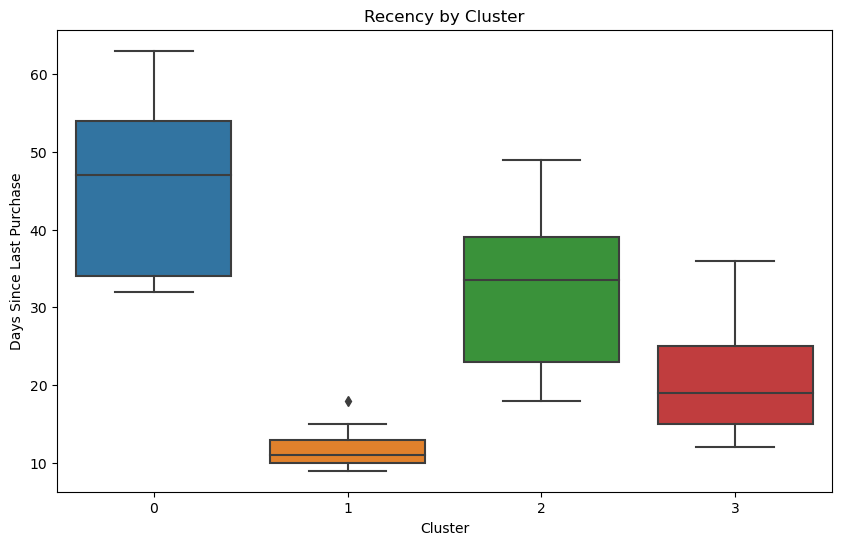

In [11]:
import seaborn as sns  # Import seaborn
# Calculate descriptive statistics for each cluster
cluster_means = data.groupby('Cluster').mean()
print("\nCluster Means:")
print(cluster_means.to_markdown(numalign="left", stralign="left"))

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Days Since Last Purchase', data=data)
plt.title('Recency by Cluster')
plt.show()